---
# Google QUEST Q&A Labeling

#### Improving automated understanding of complex question answer content
---

### **Problem Statement**

Computers are really good at answering questions with single, verifiable answers. But humans are often still better at answering questions about opinions, recommendations, or personal experiences.

Humans are better at addressing subjective questions that require a deeper, multidimensional understanding of context - something computers aren't trained to do well…yet... Questions can take many forms - some have multi-sentence elaborations; others may be simple curiosity or a fully developed problem. They can have multiple intents, or seek advice and opinions. Some may be helpful and others interesting. Some are simply right or wrong.

<img alt="iwild" src="https://gatherup.com/wp-content/uploads/2018/01/Google-QA-logo-slide.png" width="600px"/>


**The [Google Quest Q/A labelling](https://www.kaggle.com/competitions/google-quest-challenge/overview) is a Kaggle competition where participants are expected to develop predictive algorithms for different subjective aspects of question-answer from Stack Exchange. Here, Subjective aspects are human-labelled to reflect whether the question-answer is well-written, relevant, helpful, etc.**


### Data Fields
 
The [Google QUEST Q&A Labeling Dataset ](https://www.kaggle.com/competitions/google-quest-challenge/data) consists of question-answer pairs sourced from various online platforms. The dataset is designed to improve the understanding and labeling of complex question-answer content. Here is a description of the key components of the dataset:

- Train data has total of 6079 rows and 41 columns where 11 columns are features and 30 columns are labels. Test data has a total of 11 columns only for features.

- The data is taken from the Kaggle competition which includes questions and answers from various StackExchange properties. Our task is to predict the target values of 30 labels for each question-answer pair. Target labels with the prefix question_ relate to the question_title and/or question_body features in the data. Target labels with the prefix answer_ relate to the answer feature.

- Each row contains a single question and a single answer to that question, along with additional features. The training data contains rows with some duplicated questions (but with different answers). The test data does not contain any duplicated questions.

- Target labels are aggregated from multiple raters, and can have continuous values in the range [0,1]. Therefore, predictions must also be in that range.

#### Real-world/Business Objective and Constraint 
This model will help the questioner clearly frame the question based on the scoring from 21 aspects calculated from the question title and body. In addition to this pop, the best answer related to the question and its intent, based on the other 9 scorings.
The latency of the model is moderate to high.

---

### Table of Contents

- 1. Importing Libraries
- 2. Load Data
- 3. Exploratory Data Analysis
    - 3.1. Categorical Features
    - 3.2. Text Features
- 4. Feature Engineering
    - 4.1. Features for Question based Aspects
    - 4.2. Features for Answer based Aspects
- 5. Machine Learning Models
    - 5.1. Random Model
    - 5.2. KNN Model
    - 5.3. Logistic Regression
    - 5.4. Random Forest Classifier
    - 5.5. XGBoost
    - 5.6. Average of Different Model
    - 5.7. Weighted Average of Different Model
- 6. Result and Conclusion

--- 

### Evaluation Metrics

**Spearman's correlation coefficient** is a measure of the strength and direction of monotonic relationships between two variables. Unlike Pearson's correlation coefficient, which assesses linear relationships, Spearman's correlation coefficient can capture any monotonic relationship, whether it is linear or nonlinear.

The coefficient is denoted by the symbol ρ (rho) and ranges between -1 and 1. Here's a detailed explanation of how Spearman's correlation coefficient is calculated and interpreted:

- **Data Preparation:**
    - Collect the data for two variables of interest, denoted as X and Y.
    - Ensure that the data pairs (X, Y) are in the form of ranked observations rather than raw values.

- **Rank Calculation:**
    - For each variable, rank the observations separately from lowest to highest.
    - Assign a rank of 1 to the lowest observation, 2 to the second lowest, and so on.
    - In case of ties (equal values), assign the average rank to the tied observations.

- **Calculation of Differences:**
    - Calculate the difference between the ranks of corresponding pairs (X and Y) for each observation.
    - Denote these differences as d.

- **Calculation of Spearman's Correlation Coefficient:**
    - Use the formula ρ = 1 - (6 * Σd²) / (n * (n² - 1)), where Σd² is the sum of squared differences and n is the number of observations.

- **Interpretation:**
    - ρ = 1: There is a perfect positive monotonic relationship between X and Y, meaning that as X increases, Y also increases monotonically.
    - ρ = -1: There is a perfect negative monotonic relationship between X and Y, meaning that as X increases, Y decreases monotonically.
    - ρ = 0: There is no monotonic relationship between X and Y.
    - Values between -1 and 1 indicate the strength and direction of the monotonic relationship. The closer the value is to -1 or 1, the stronger the relationship.
    - A positive ρ indicates a positive monotonic relationship, while a negative ρ indicates a negative monotonic relationship.

Spearman's correlation coefficient is particularly useful when the relationship between variables is not strictly linear but follows a consistent monotonic pattern. It is also robust to outliers since it relies on ranks rather than the actual values of the variables.

Submissions are evaluated on the mean column-wise Spearman's correlation coefficient. The Spearman's rank correlation is computed for each target column, and the mean of these values is calculated for the submission score.

**In this notebook, aims to analyze and predict certain aspects based on the given dataset using various machine learning models and evaluating models using Spearman's correlation coefficient.**

## 1. Importing Libraries

In [1]:
# Installing scikit-learn version 0.24.2 may require administrative privileges.
! pip install scikit-learn==0.24.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.3/22.3 MB 50.4 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.24.2 which is incompatible.
pdpbox 0.2.1 requires matplotlib==3.1.1, but you have matplotlib 3.5.3 which is incompatible.
mlxtend 0.20.0 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.
imbalanced-learn 0.9.0 requires scikit-learn>=1.0.1, but you have scikit-learn 0.24.2 which is incompatible.
gplearn 0.4.2 requires scikit-learn>=1.0.2, but you have scikit-learn 0.24.2 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protob

**Imports various libraries and modules for data analysis and machine learning tasks.**

- **os:** It provides a way to interact with the operating system, allowing tasks such as file and directory manipulation.

- **pickle:** It is used for serializing and de-serializing Python objects, allowing them to be saved to a file and loaded back into memory.

- **random:** It provides functions for generating random numbers, which can be useful for tasks such as shuffling data or creating random subsets.

- **re:** It is the regular expression module, used for pattern matching and manipulation of strings.

- **string:** It provides a collection of string constants and functions, including string manipulation operations.

- **warnings:** It allows the control of warning messages, such as filtering or suppressing them.

- **category_encoders:** It is a library that provides various encoding techniques for categorical variables in machine learning models.

- **matplotlib.pyplot:** It is a plotting library used for creating visualizations, such as line plots, bar plots, histograms, etc.

- **numpy:** It is a library for numerical computations in Python, providing support for large, multi-dimensional arrays and matrices.

- **pandas:** It is a powerful data manipulation and analysis library, providing data structures and functions for handling structured data.

- **seaborn:** It is a data visualization library based on matplotlib, offering a high-level interface for creating informative and attractive statistical graphics.

- **nltk:** It is the Natural Language Toolkit, providing tools and resources for working with human language data, including text preprocessing and tokenization.

- **scipy:** It is a library for scientific and technical computing, providing a wide range of numerical algorithms and statistical functions.

- **sklearn:** It is the scikit-learn library, a popular machine learning library that offers a wide range of algorithms and utilities for data preprocessing, model selection, and evaluation.

- **xgboost:** It is an optimized gradient boosting library used for building machine learning models.

- **wordcloud:** It is a library for generating word clouds, which are visual representations of text data where the size of each word indicates its frequency or importance.

In [2]:
# necessary libraries and modules for performing various data analysis, preprocessing, and machine learning tasks.
import os
import pickle
import random
import re
import string
import warnings

import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import word_tokenize
from scipy import stats

from sklearn import preprocessing, utils
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from xgboost import XGBClassifier
from wordcloud import WordCloud
from xgboost import XGBRegressor

warnings.filterwarnings("ignore")

## 2. Load Data

In [3]:
# load data
data = pd.read_csv('../input/google-quest-challenge-files/data/train.csv')
# data = pd.read_csv('./data/train.csv')
train_cols = ['qa_id', 'question_title', 'question_body', 'question_user_name',
       'question_user_page', 'answer', 'answer_user_name', 'answer_user_page',
       'url', 'category', 'host']
X = data[train_cols]
y = data.drop(columns=train_cols)

In [4]:
X.head(2)

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,photo.stackexchange.com
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,rpg.stackexchange.com


In [5]:
y.head(2)

,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,question_not_really_a_question,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,1.0,0.333333,0.0,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.0,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.0,0.000000,1.000000
1,1.0,1.000000,0.0,0.5,1.0,1.0,0.444444,0.444444,0.666667,0.0,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.0,0.666667,0.888889


In [6]:
'''To identify and separate the aspects related to questions and answers in the given dataset. 
It categorizes the columns of y into question-related aspects and answer-related aspects and prints them separately.'''

question_related_aspects = []
answer_related_aspects = []

for col in y.columns:
    if 'question' in col:
        question_related_aspects.append(col)
    else:
        answer_related_aspects.append(col)

print(f" Aspects related to question : {len(question_related_aspects)} - {question_related_aspects}")
print()
print(f" Aspects related to answer : {len(answer_related_aspects)} - {answer_related_aspects}")

 Aspects related to question : 21 - ['question_asker_intent_understanding', 'question_body_critical', 'question_conversational', 'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice', 'question_type_compare', 'question_type_consequence', 'question_type_definition', 'question_type_entity', 'question_type_instructions', 'question_type_procedure', 'question_type_reason_explanation', 'question_type_spelling', 'question_well_written']

 Aspects related to answer : 9 - ['answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance', 'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written']


Quick Observation: <br>

<li> Number of Text Features are 3 : question_title, question_body, answer. <br>
<li> Number of Categorical Features are 8 : qa_id, question_user_name, question_user_page, answer_user_name, answer_user_page, url, category, host. <br>
<li> Number of Numerical Features are 0.

In [7]:
# To split the data into training and testing sets and provide an overview of the resulting shapes of the feature and target matrices for both the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)
print("y_train Shape : ", y_train.shape)
print("X_test Shape : ", y_test.shape)


X_train Shape :  (4863, 11)
X_test Shape :  (1216, 11)
y_train Shape :  (4863, 30)
X_test Shape :  (1216, 30)


## 3. Exploratory Data Analysis
<a id='3'></a>

### 3.1 Categorical Features

#### 3.1.1. Cardinality of Categorical Features

In [8]:
'''To provide insights into the cardinality of each categorical feature in the DataFrame X. 
By printing the feature name and its corresponding cardinality, it helps in understanding the diversity of unique 
values present in each categorical feature, which can be useful for feature engineering and further analysis.'''

categorical_features = ['qa_id', 'question_user_name', 'question_user_page', 'answer_user_name',
                         'answer_user_page', 'url', 'category', 'host']
for i in categorical_features:
    print(f'Cadinality of feature {i} - {X[i].nunique()}')

Cadinality of feature qa_id - 6079
Cadinality of feature question_user_name - 3215
Cadinality of feature question_user_page - 3422
Cadinality of feature answer_user_name - 4114
Cadinality of feature answer_user_page - 4430
Cadinality of feature url - 3583
Cadinality of feature category - 5
Cadinality of feature host - 63


Quick Observation: <br>

<li> Features qa_id, question_user_name, question_user_page, answer_user_name, answer_user_page, url will be dropped due to high cardinality. <br>
<li> Since the cardinality of host is 63 (moderately high) so binary encoding is better rather than one hot encoding.

In [9]:
X_train = X_train[['question_title', 'question_body', 'answer', 'category', 'host']]
X_test = X_test[['question_title', 'question_body', 'answer', 'category', 'host']]

#### 3.1.2. Analysis of category

In [10]:
# Checking null values in test data
miss = len(X_train['category'].isnull())
total = len(X_train['category'])
print(f"Number of NULL Values in test data, category column is {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")

miss = len(X_test['category'].isnull())
total = len(X_test['category'])
print(f"Number of NULL Values in test data, category column is {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")

Number of NULL Values in test data, category column is 4863 out if 4863. Percent of missing value: 0.0%.
Number of NULL Values in test data, category column is 1216 out if 1216. Percent of missing value: 0.0%.


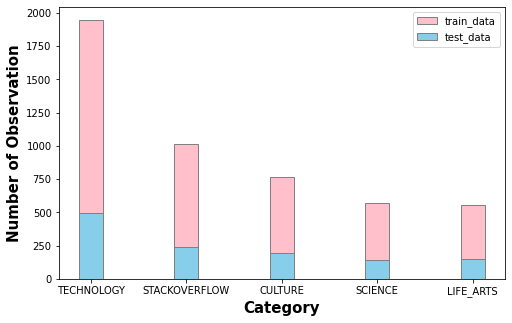

In [11]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
train_data_category = X_train['category'].value_counts()
# print(train_data_category)
test_data_category = X_test['category'].value_counts()
test_data_category = test_data_category.loc[train_data_category.index]
# print(test_data_category)

# Set position of bar on X axis
br1 = np.arange(len(train_data_category))
br2 = [x for x in br1]

# Make the plot
plt.bar(br1, train_data_category, color ='#FFC0CB', width = barWidth,
        edgecolor ='grey', label ='train_data')
plt.bar(br2, test_data_category, color ='#87CEEB', width = barWidth,
        edgecolor ='grey', label ='test_data')


# Adding Xticks
plt.xlabel('Category', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Observation', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(train_data_category))],
        train_data_category.index)

plt.legend()
plt.show()


#### 3.1.3. Analysis of host

In [12]:
# Checking null values in training data
miss = len(X_train['host'].isnull())
total = len(X_train['host'])
print(f"Number of NULL Values in train data, host column is {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")

miss = len(X_test['host'].isnull())
total = len(X_test['host'])
print(f"Number of NULL Values in test data, host column is {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")

Number of NULL Values in train data, host column is 4863 out if 4863. Percent of missing value: 0.0%.
Number of NULL Values in test data, host column is 1216 out if 1216. Percent of missing value: 0.0%.


Quick Observation: <br>

<li> No Null/missing Values <br>
<li> Technology has number of observation more than other host.

### 3.2 Text Features

In the dataset, we have 3 text feature namely: question_tile, question_body & answer.

In [13]:
# https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/47091490#47091490

'''to expand contractions in a given text, converting them to their full forms. This can be useful for text preprocessing tasks, 
such as standardizing text or improving the accuracy of certain NLP applications that rely on full-word representations.'''

def decontracted(phrase):
    phrase = re.sub(r"(W|w)on(\'|\’)t ", "will not ", phrase)
    phrase = re.sub(r"(C|c)an(\'|\’)t ", "can not ", phrase)
    phrase = re.sub(r"(Y|y)(\'|\’)all ", "you all ", phrase)
    phrase = re.sub(r"(Y|y)a(\'|\’)ll ", "you all ", phrase)
    phrase = re.sub(r"(I|i)(\'|\’)m ", "i am ", phrase)
    phrase = re.sub(r"(A|a)isn(\'|\’)t ", "is not ", phrase)
    phrase = re.sub(r"n(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)re ", " are ", phrase)
    phrase = re.sub(r"(\'|\’)d ", " would ", phrase)
    phrase = re.sub(r"(\'|\’)ll ", " will ", phrase)
    phrase = re.sub(r"(\'|\’)t ", " not ", phrase)
    phrase = re.sub(r"(\'|\’)ve ", " have ", phrase)
    return phrase

'''To clean text by removing or replacing specific punctuation marks, which can be useful for standardizing text and removing noise or unwanted characters.'''
def clean_text(x):
    x = str(x)
    for punct in "/-'":
        x = x.replace(punct, ' ')
    for punct in '&':
        x = x.replace(punct, f' {punct} ')
    for punct in '?!.,"#$%\'()*+-/:;<=>@[\\]^_`{|}~' + '“”’':
        x = x.replace(punct, '')
    return x

'''To clean and normalize numbers in the text by replacing sequences of digits with predefined placeholders. 
This can be useful for text preprocessing tasks where the specific numerical values are not essential and can be treated uniformly.'''
def clean_numbers(x):
    x = re.sub('[0-9]{5,}', '12345', x)
    x = re.sub('[0-9]{4}', '1234', x)
    x = re.sub('[0-9]{3}', '123', x)
    x = re.sub('[0-9]{2}', '12', x)
    return x

# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]


stemmer = SnowballStemmer("english")

# Combining all the above stundents 
from tqdm import tqdm
def preprocess_text(text_data):
    preprocessed_text = []
    # tqdm is for printing the status bar
    for sentance in tqdm(text_data):
        sent = decontracted(sentance)
        sent = clean_text(sentance)
        sent = clean_numbers(sentance)
        sent = sent.replace('\\r', ' ')
        sent = sent.replace('\\n', ' ')
        sent = sent.replace('\\"', ' ')
        sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
        # https://gist.github.com/sebleier/554280
        sent = ' '.join(stemmer.stem(e) for e in sent.split() if e.lower() not in stopwords)
        preprocessed_text.append(sent.lower().strip())
    return preprocessed_text

#regular expression pattern using a character class [^a-zA-Z0-9\s]. 
#It matches any character that is not an uppercase or lowercase letter (a-z and A-Z), not a digit (0-9), and not a whitespace character (\s).
'''To provide a count of special symbols (non-alphanumeric characters) in a given string. 
It can be useful for various text analysis tasks, such as identifying and quantifying the presence of 
punctuation marks, symbols, or other non-alphanumeric characters in text data.'''
def special_symbols(string):
    pattern = r'[^a-zA-Z0-9\s]'  
    matches = re.finditer(pattern, string, re.MULTILINE)
    return len([_ for _ in matches])

In [14]:
'''To determine the ratio of vowels to consonants in a given string. 
It can be useful for analyzing the linguistic characteristics of text data or for 
specific applications where the vowel-consonant ratio is relevant.'''

def no_of_vowels_and_consonants(str):
    vowel = {'a','e','i','o','u'}
    consonant = set(string.ascii_lowercase) - vowel

    def count_letters(lst, set_):
        return sum([1 for i in lst if i in set_])
    
    vowels_count = count_letters(list(str), vowel)
    consonants_count = count_letters(list(str), consonant)
    total = vowels_count + consonants_count + 1
    return [vowels_count/total, consonants_count/total] #ratio

In [15]:
'''This function is to count the number of nouns in a given string. It utilizes the NLTK library's tokenization, 
text processing, and POS tagging capabilities to perform the analysis. It can be useful for tasks such as text classification, 
information extraction, or linguistic analysis that require identifying and counting nouns in text data.'''

def no_of_nouns(str):
    tokens = nltk.word_tokenize(str.lower())
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    return sum([1 for word,pos in tags if 'NN' in pos])

In [16]:
'''applies preprocessing techniques, calculates the length of preprocessed text, and counts the number of special symbols in specific columns of the training and test data. 
These steps aim to extract relevant features for the subsequent machine learning tasks.'''

#######################################################################################################
X_train['preprocessed_question_title'] = preprocess_text(X_train['question_title'].values)
X_train['preprocessed_question_body'] = preprocess_text(X_train['question_body'].values)
X_train['preprocessed_answer'] = preprocess_text(X_train['answer'].values)
#######################################################################################################
X_test['preprocessed_question_title'] = preprocess_text(X_test['question_title'].values)
X_test['preprocessed_question_body'] = preprocess_text(X_test['question_body'].values)
X_test['preprocessed_answer'] = preprocess_text(X_test['answer'].values)
#######################################################################################################
X_train['question_title_length'] = X_train['preprocessed_question_title'].apply(lambda x: len(x.split()))
X_test['question_title_length'] = X_test['preprocessed_question_title'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['question_body_length'] = X_train['preprocessed_question_body'].apply(lambda x: len(x.split()))
X_test['question_body_length'] = X_test['preprocessed_question_body'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['answer_length'] = X_train['preprocessed_answer'].apply(lambda x: len(x.split()))
X_test['answer_length'] = X_test['preprocessed_answer'].apply(lambda x: len(x.split()))
#######################################################################################################
X_train['question_title_special_symbols'] = X_train['question_title'].apply(special_symbols)
X_train['question_body_special_symbols'] = X_train['question_body'].apply(special_symbols)
X_train['answer_special_symbols'] = X_train['answer'].apply(special_symbols)
#######################################################################################################
X_test['question_title_special_symbols'] = X_test['question_title'].apply(special_symbols)
X_test['question_body_special_symbols'] = X_test['question_body'].apply(special_symbols)
X_test['answer_special_symbols'] = X_test['answer'].apply(special_symbols)
#######################################################################################################

100%|██████████| 1216/1216 [00:01<00:00, 622.46it/s]


In [17]:
X_train.head()

,question_title,question_body,answer,category,host,preprocessed_question_title,preprocessed_question_body,preprocessed_answer,question_title_length,question_body_length,answer_length,question_title_special_symbols,question_body_special_symbols,answer_special_symbols
861,Get raw output from web server,For research I am looking to get the actual ra...,Add the --save-headers option to the wget comm...,TECHNOLOGY,serverfault.com,get raw output web server,research look get actual raw output apach send...,add save header option wget command line,5,41,7,0,21,4
2576,"How to prevent the ""Too awesome to use"" syndrome",When you give the player a rare but powerful i...,Short Answer: \n\nHave something more valuable...,TECHNOLOGY,gamedev.stackexchange.com,prevent awesom use syndrom,give player rare power item use never realli r...,short answer someth valuabl item player lose h...,4,62,177,2,18,46
903,High ping on games while streaming,I'm streaming with Elgato Capture Card to Twit...,The problem is you upload speed =(. When you a...,CULTURE,gaming.stackexchange.com,high ping game stream,stream elgato captur card twitch get high ping...,problem upload speed stream send lot data ping...,4,15,30,0,7,13
2534,How to check image is loaded completely or not...,I m trying to execute some code when image is ...,You can use the onLoad event\n\n&lt;script lan...,STACKOVERFLOW,stackoverflow.com,check imag load complet not use javascript fac...,tri execut code imag not load use follow code ...,use onload event lt script languag javascript ...,8,31,20,0,34,27
109,Facebook Connect Changed My User ID and Delete...,So this actually happened a long time ago I ju...,This isn't possible without hours of painful d...,TECHNOLOGY,meta.stackexchange.com,facebook connect chang user id delet badg,actual happen long time ago never complain bet...,possibl without hour pain dev work manual mani...,7,51,19,0,28,6


#### 3.2.1. Analysis of question_title 

In [18]:
'''provides insights into the missing values and unique values in the 'question_title' column for both the training and test datasets. 
It helps in understanding the data quality and distribution of values in that particular column.'''

miss = len(X_train['question_title'].isnull())
total = len(X_train['question_title'])
print(f"Number of NULL Values in question title, {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_train['question_title'].nunique())

miss = len(X_test['question_title'].isnull())
total = len(X_test['question_title'])
print(f"Number of NULL Values {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_test['question_title'].nunique())


Number of NULL Values in question title, 4863 out if 4863. Percent of missing value: 0.0%.
Number of unique Values  3190
Number of NULL Values 1216 out if 1216. Percent of missing value: 0.0%.
Number of unique Values  1091


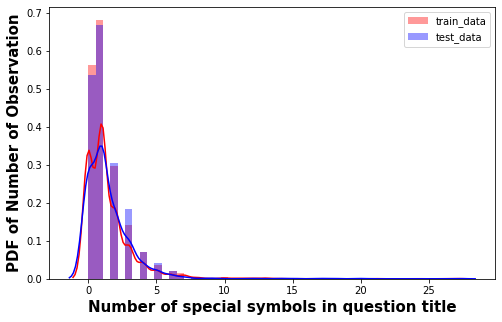

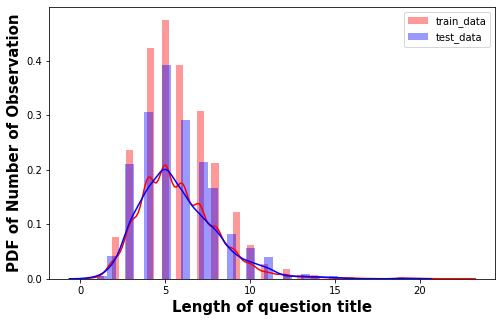

In [19]:
'''Generates two separate plots to visualize the distribution of the number of special symbols and the length of question titles in the training and test datasets. 
The plots provide insights into the patterns and variations in these features across the datasets. 
The sns.distplot() function is used to create kernel density estimation plots, which estimate the probability density function of the given data. 
The plots help in understanding the data distribution and identifying any potential differences between the training and test datasets.'''

print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['question_title_special_symbols'], label = 'train_data', color ='r' )
sns.distplot(X_test['question_title_special_symbols'], label = 'test_data', color ='b')
plt.xlabel('Number of special symbols in question title', fontweight ='bold', fontsize = 15)
plt.ylabel('PDF of Number of Observation', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['question_title_length'], label = 'train_data', color ='r')
sns.distplot(X_test['question_title_length'], label = 'test_data', color ='b')
plt.xlabel('Length of question title', fontweight ='bold', fontsize = 15)
plt.ylabel('PDF of Number of Observation', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

In [20]:
'''To provide a simple summary of the average number of symbols and the average length of question titles in the training dataset. 
By calculating the means, it gives an indication of the typical number of symbols and the typical length of question titles in the dataset. 
This information can be useful for understanding the general characteristics and patterns of the question titles in the training data.'''

print("Mean number of symbol in question title :", np.mean(X_train['question_title_special_symbols']))
print("Mean length of question title :", np.mean(X_train['question_title_length']))

Mean number of symbol in question title : 1.4665844129138392
Mean length of question title : 5.776475426691343


Quick Observation: <br>

<li> Contains duplicate value.<br>
<li> Number of symbol per words in question title is 0.253 . <br>
<li> Max Length of question is 22.

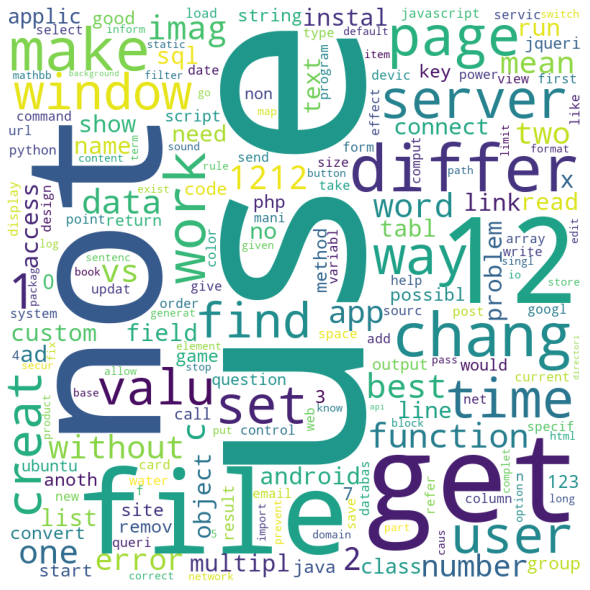

In [21]:
'''The generated WordCloud provides a visual representation of the most frequent words in the preprocessed question titles from the training data. 
The size of each word in the WordCloud corresponds to its frequency, with larger words indicating higher frequencies. 
This visualization helps identify the prominent words or themes present in the question titles.'''

wordfreq = {}
for word in ' '.join(X_train['preprocessed_question_title']).split():
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords,
            min_font_size = 10).generate_from_frequencies(wordfreq)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### 3.2.2. Analysis of question_body 

In [22]:
'''Provides insights into the missing values and uniqueness of values in the 'question_body' column of the datasets, 
allowing you to understand the data quality and variety in this specific column.'''

miss = len(X_train['question_body'].isnull())
total = len(X_train['question_body'])
print(f"Number of NULL Values in question body, {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_train['question_body'].nunique())

miss = len(X_test['question_body'].isnull())
total = len(X_test['question_body'])
print(f"Number of NULL Values {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_test['question_body'].nunique())

Number of NULL Values in question body, 4863 out if 4863. Percent of missing value: 0.0%.
Number of unique Values  3190
Number of NULL Values 1216 out if 1216. Percent of missing value: 0.0%.
Number of unique Values  1091


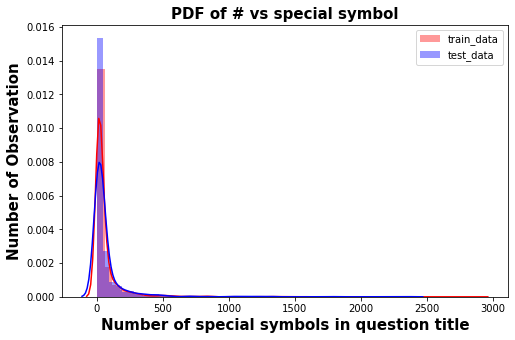

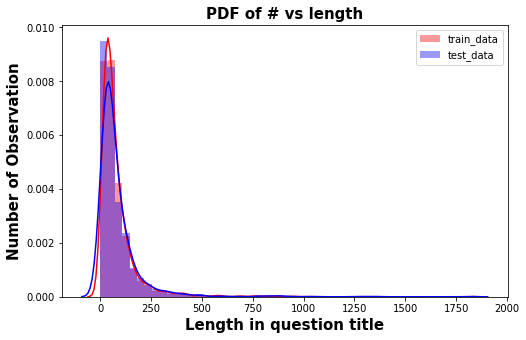

In [23]:
print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['question_body_special_symbols'], label = 'train_data', color ='r' )
sns.distplot(X_test['question_body_special_symbols'], label = 'test_data', color ='b')
plt.xlabel('Number of special symbols in question title', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Observation', fontweight ='bold', fontsize = 15)
plt.title("PDF of # vs special symbol", fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['question_body_length'], label = 'train_data', color ='r')
sns.distplot(X_test['question_body_length'], label = 'test_data', color ='b')
plt.xlabel('Length in question title', fontweight ='bold', fontsize = 15)
plt.ylabel('Number of Observation', fontweight ='bold', fontsize = 15)
plt.title("PDF of # vs length", fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

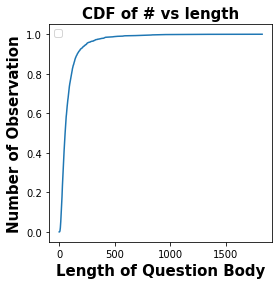

In [24]:
'''calculates and plots the cumulative distribution function (CDF) of the number of observations versus the length of the question body.
The plot provides a visual representation of how the number of observations increases as the length of the question body increases. 
It helps to understand the distribution and concentration of observations based on the length of the question body.'''

# percentile values
question_body_percentile = []
train_tmp = X_train['question_body_length'].value_counts().sort_index().cumsum()
train_tmp = train_tmp / max(train_tmp)
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)

plt.plot(train_tmp)
plt.legend()
plt.xlabel("Length of Question Body", fontweight ='bold', fontsize = 15)
plt.ylabel("Number of Observation", fontweight ='bold', fontsize = 15)
plt.title("CDF of # vs length", fontweight ='bold', fontsize = 15)
plt.show()

Quick Observation: <br>

<li> Contains duplicate Values.
<li> More than 90 percentile of have length less than 500. <br>

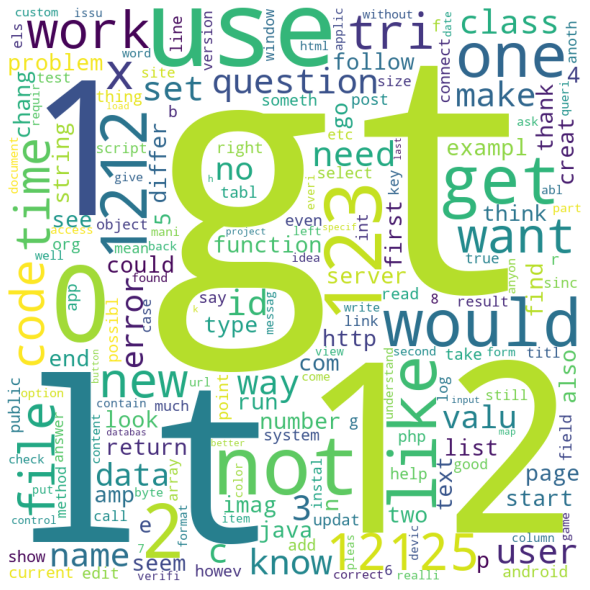

In [25]:
'''The word cloud provides a visual representation of the most frequent words in the preprocessed question bodies. 
The size of each word in the word cloud corresponds to its frequency, with larger words indicating higher frequencies. 
It helps to identify the prominent keywords or topics present in the question bodies.'''

wordfreq = {}
for word in ' '.join(X_train['preprocessed_question_body']).split():
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords,
            min_font_size = 10).generate_from_frequencies(wordfreq)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

#### 3.2.3. Analysis of answer

In [26]:
miss = len(X_train['answer'].isnull())
total = len(X_train['answer'])
print(f"Number of NULL Values in question body, {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_train['answer'].nunique())

miss = len(X_test['answer'].isnull())
total = len(X_test['answer'])
print(f"Number of NULL Values {miss} out if {total}. Percent of missing value: {(total-miss)/total}%.")
print("Number of unique Values ", X_test['answer'].nunique())


Number of NULL Values in question body, 4863 out if 4863. Percent of missing value: 0.0%.
Number of unique Values  4863
Number of NULL Values 1216 out if 1216. Percent of missing value: 0.0%.
Number of unique Values  1216


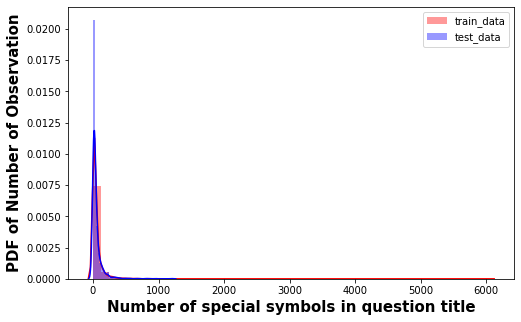

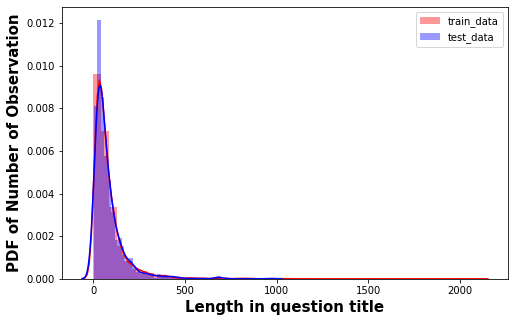

In [27]:
print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['answer_special_symbols'], label = 'train_data', color ='r' )
sns.distplot(X_test['answer_special_symbols'], label = 'test_data', color ='b')
plt.xlabel('Number of special symbols in question title', fontweight ='bold', fontsize = 15)
plt.ylabel('PDF of Number of Observation', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))
sns.distplot(X_train['answer_length'], label = 'train_data', color ='r')
sns.distplot(X_test['answer_length'], label = 'test_data', color ='b')
plt.xlabel('Length in question title', fontweight ='bold', fontsize = 15)
plt.ylabel('PDF of Number of Observation', fontweight ='bold', fontsize = 15)
plt.legend()
plt.show()

print('='*100)

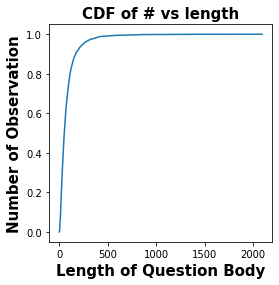

In [28]:
# percentile values
question_body_percentile = []
train_tmp = X_train['answer_length'].value_counts().sort_index().cumsum()
train_tmp = train_tmp / max(train_tmp)
# plot the WordCloud image                      
plt.figure(figsize = (4, 4), facecolor = None)

plt.plot(train_tmp)
plt.xlabel("Length of Question Body", fontweight ='bold', fontsize = 15)
plt.ylabel("Number of Observation", fontweight ='bold', fontsize = 15)
plt.title("CDF of # vs length", fontweight ='bold', fontsize = 15)
plt.show()

Quick Observation: <br>
<li> Does not contain duplicate values.<br>
<li> More than 90 percentile of have length less than 500 (Same observation as question_body). <br>

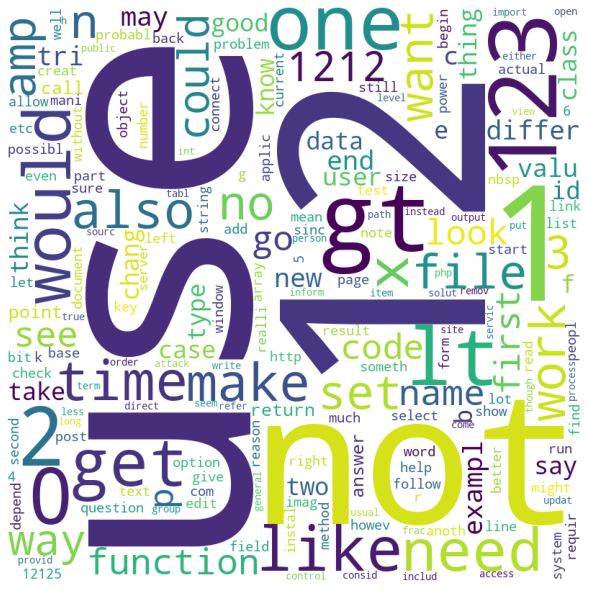

In [29]:
wordfreq = {}
for word in ' '.join(X_train['preprocessed_answer']).split():
    if word not in wordfreq:
        wordfreq[word] = 0 
    wordfreq[word] += 1

# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)

wordcloud = WordCloud(width = 800, height = 800, 
            background_color ='white', 
            stopwords = stopwords,
            min_font_size = 10).generate_from_frequencies(wordfreq)

plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Final EDA Observation:
<li> For same question title and body mutiple answer available. <br>
<li> Usable features are category, host, question_title, question_body, answer. <br>


## 4. Feature Engineering
<a id='4'></a>

In [30]:
# Binary Encoding of Categorical Feature: host
binaryencoder = ce.BinaryEncoder() 
X_train_host = binaryencoder.fit_transform(X_train['host'])
X_test_host = binaryencoder.transform(X_test['host'])

# Binary Encoding of Categorical Feature: category
binaryencoder = ce.BinaryEncoder() 
X_train_category = binaryencoder.fit_transform(X_train['category'])
X_test_category = binaryencoder.fit_transform(X_test['category'])

In [31]:
'''The TF-IDF matrix representations of the preprocessed questions and answers are useful for representing text data numerically, 
capturing the importance of each term within the context of the corpus. These vectorized representations can then be used as 
input for various machine learning algorithms to build models for tasks such as question-answering.'''

X_train['preprocessed_question'] = X_train['preprocessed_question_title'] + X_train['preprocessed_question_body']
X_test['preprocessed_question'] = X_test['preprocessed_question_title'] + X_test['preprocessed_question_body']

vectorizer = TfidfVectorizer(ngram_range = (1,4), min_df=4)
X_train_question_tfidf = vectorizer.fit_transform(X_train['preprocessed_question'])
X_test_question_tfidf = vectorizer.transform(X_test['preprocessed_question'])

vectorizer = TfidfVectorizer(ngram_range = (1,4), min_df=4)
X_train_answer_tfidf = vectorizer.fit_transform(X_train['preprocessed_answer'])
X_test_answer_tfidf = vectorizer.transform(X_test['preprocessed_answer'])


In [32]:
X_train_answer_tfidf.shape

(4863, 11936)

### 4.1 Features for Question based Aspects

In [33]:
# The concatenation is performed using pd.concat, with the axis set to 1 to concatenate the dataframes horizontally.
X_train_A = pd.concat([pd.DataFrame(X_train_question_tfidf.toarray()), X_train_host.reset_index(drop = True), X_train_category.reset_index(drop = True), X_train[['question_title_length', 'question_body_length', 'answer_length', 'question_title_special_symbols', 'question_body_special_symbols',	'answer_special_symbols']].reset_index(drop = True)], axis=1)
X_test_A = pd.concat([pd.DataFrame(X_test_question_tfidf.toarray()), X_test_host.reset_index(drop = True), X_test_category.reset_index(drop = True), X_test[['question_title_length', 'question_body_length', 'answer_length', 'question_title_special_symbols', 'question_body_special_symbols',	'answer_special_symbols']].reset_index(drop = True)], axis=1)

In [34]:
print(X_train_A.shape)
print(X_test_A.shape)
print(y_train.shape)
print(y_test.shape)

(4863, 29510)
(1216, 29510)
(4863, 30)
(1216, 30)


### 4.2 Features for Answer based Aspects

In [35]:
X_train_B = pd.concat([pd.DataFrame(X_train_answer_tfidf.toarray()), X_train_host.reset_index(drop = True), X_train_category.reset_index(drop = True), X_train[['question_title_length', 'question_body_length', 'answer_length', 'question_title_special_symbols', 'question_body_special_symbols',	'answer_special_symbols']].reset_index(drop = True)], axis=1)
X_test_B = pd.concat([pd.DataFrame(X_test_answer_tfidf.toarray()), X_test_host.reset_index(drop = True), X_test_category.reset_index(drop = True), X_test[['question_title_length', 'question_body_length', 'answer_length', 'question_title_special_symbols', 'question_body_special_symbols',	'answer_special_symbols']].reset_index(drop = True)], axis=1)

In [36]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)
print(" ==== Features for Question Based Aspect ==== ")
print(X_train_A.shape)
print(X_test_A.shape)
print(" ==== Features for Answer Based Aspect ==== ")
print(X_train_B.shape)
print(X_test_B.shape)
print(" ==== Labels ==== ")
print(y_train.shape)
print(y_test.shape)

 ==== Features for Question Based Aspect ==== 
(4863, 29510)
(1216, 29510)
 ==== Features for Answer Based Aspect ==== 
(4863, 11951)
(1216, 11951)
 ==== Labels ==== 
(4863, 30)
(1216, 30)


In [37]:
# saving train and test data
path = './'
# path = '../input/google-quest-challenge-files/'
if False:
# if True:
    X_train_A.to_csv(path+'X_train_A.csv', index=False)
    X_test_A.to_csv(path+'X_test_A.csv', index=False)
    X_train_B.to_csv(path+'X_train_B.csv', index=False)
    X_test_B.to_csv(path+'X_test_B.csv', index=False)
    y_train.to_csv(path+'y_train.csv', index=False)
    y_test.to_csv(path+'y_test.csv', index=False)

if False:
# if True:
    
    path = '../input/google-quest-challenge-files/'
    X_train_A = pd.read_csv(path+'X_train_A.csv')
    X_test_A = pd.read_csv(path+'X_test_A.csv')
    X_train_B = pd.read_csv(path+'X_train_B.csv')
    X_test_B = pd.read_csv(path+'X_test_B.csv')
    y_train = pd.read_csv(path+'y_train.csv')
    y_test = pd.read_csv(path+'y_test.csv')

## 5. Machine Learning Model
<a id='5'></a>

<li> Labels have low cardinality, so we performed classification by encoding labels to classes then decoding the labels.</li>

In [38]:
y_label_question_names = ['question_asker_intent_understanding', 'question_body_critical', 'question_conversational', 'question_expect_short_answer', 'question_fact_seeking', 'question_has_commonly_accepted_answer', 'question_interestingness_others', 'question_interestingness_self', 'question_multi_intent', 'question_not_really_a_question', 'question_opinion_seeking', 'question_type_choice', 'question_type_compare', 'question_type_consequence', 'question_type_definition', 'question_type_entity', 'question_type_instructions', 'question_type_procedure', 'question_type_reason_explanation', 'question_type_spelling', 'question_well_written']
y_label_answer_names = ['answer_helpful', 'answer_level_of_information', 'answer_plausible', 'answer_relevance', 'answer_satisfaction', 'answer_type_instructions', 'answer_type_procedure', 'answer_type_reason_explanation', 'answer_well_written']

print("Number of labels related to question: ",len(y_label_question_names))
print("Number of labels related to answer: ", len(y_label_answer_names))

Number of labels related to question:  21
Number of labels related to answer:  9


In [39]:
class encoder_decoder:
    """
    Used to encode numberical label to classes
    """
    
    def __init__(self):
        pass

    def fit(self, array):
        # array = [i.round(6) for i in array]
        self.unique_labels = np.sort(np.unique(array))
        self.label_dict = {v:k for v,k in enumerate(self.unique_labels)}
        self.reverse_label_dict = {k:v for v,k in enumerate(self.unique_labels)}
        
    def encode(self, array):
        encoded_array = np.array([self.reverse_label_dict[i] for i in array])
        return encoded_array

    def decode(self, array):
        decoded_array = np.array([self.label_dict[i] for i in array])
        return decoded_array
    
# def accuracy_score(y_true,y_pred):
#     score = 0
#     for yt,yp in zip(y_true, y_pred):
#         if yt == yp:
#             score += 1
#     return score/len(y_true)

# def accuracy_score_off_by_1(y_true,y_pred):
#     score = 0
#     for yt,yp in zip(y_true, y_pred):
#         if yt == yp or yt == yp-1 or yt == yp+1:
#             score += 1
#     return score/len(y_true)

# Spearman's correlation coefficient
def spearmancoff(df, y_test):
    smr = 0
    for i in range(df.shape[0]):
        smr += stats.spearmanr(df.loc[i].values, y_test.loc[i].values)[0]
    return smr/df.shape[0]


### 5.1 Random Model

In [40]:
'''To evaluate the performance of random predictions by calculating the Spearman's correlation coefficient between the random predictions and the actual y-values in the test set. 
This provides a baseline measure of correlation to compare against the performance of other prediction models.'''

Random_Pred = pd.DataFrame()
for aspect in y_label_question_names+y_label_answer_names:
    
    ytrain_ = y_train[aspect].values
    ytest_ = y_test[aspect].values
    
    ed = encoder_decoder()
    ed.fit(ytrain_)
    ytrain = ed.encode(ytrain_)
    ytest = ed.encode(ytest_)

    ypred = [random.choice(ed.unique_labels) for _ in range(len(ytest))]
    Random_Pred[aspect] = ypred
    
print("Spearman's correlation coefficient:-", spearmancoff(Random_Pred, y_test))

Spearman's correlation coefficient:- 0.15682009853912557


### 5.2 KNN Model
**KNN classification**, or K-Nearest Neighbors classification, is a non-parametric algorithm used for both binary and multi-class classification problems. It is based on the principle that data points with similar attributes tend to belong to the same class.

**Here is a detailed explanation of how KNN classification works:**

- **Distance Calculation:**
     - KNN uses a distance metric, typically Euclidean distance, to measure the similarity between data points.
     - Euclidean distance between two points (x1, y1) and (x2, y2) is calculated as sqrt((x2 - x1)^2 + (y2 - y1)^2).
     - Other distance metrics like Manhattan distance or Minkowski distance can also be used.

- **Selecting K:**
     - Choose the number of nearest neighbors (K) to consider when making predictions.
     - K is usually an odd number to avoid ties in case of binary classification.

- **Predicting the Class Label:**
     - Given a new unlabeled data point, the algorithm finds the K nearest neighbors from the training dataset based on the chosen distance metric.
     - The class label for the new data point is determined by a majority vote of the class labels of its K nearest neighbors.
     - If K=1, the new data point is assigned the class label of its closest neighbor.

- **Handling Ties:**
     - In case of a tie in votes for the class label, various approaches can be used. For example, selecting the class label of the nearest neighbor among the tied classes, or considering the distances of the neighbors as weights in the voting process.

- **Model Evaluation:**
     - The performance of the KNN classifier can be evaluated using various metrics such as accuracy, precision, recall, and F1 score.
     - The choice of evaluation metric depends on the specific classification problem and requirements.

- **Parameter Tuning:**
     - The choice of K and the distance metric are important parameters that can affect the performance of the KNN classifier.
     - Different values of K and alternative distance metrics can be explored through cross-validation or other techniques to find the optimal configuration.

KNN classification is known for its simplicity and ease of implementation. However, it can be computationally expensive for large datasets since it requires calculating distances between the new data point and all training instances. Additionally, appropriate feature scaling and handling imbalanced datasets can also impact the performance of KNN classification.

<li> For each aspect we train individual model then combine to obtain the accuracy score.

In [41]:
# pathPred = './'
pathPred = '../input/google-quest-challenge-files/predictions'

if not os.path.exists(os.path.join(pathPred, 'KNN_Pred.csv')):
# if True:        
    KNN_Pred = pd.DataFrame()
    KNN_Summary = pd.DataFrame(columns=['aspect', 'Best Hyperparameter', 'f1_macro'])
    for aspect in y_label_question_names+y_label_answer_names:
    
        ytrain_ = y_train[aspect].values
        ytest_ = y_test[aspect].values
        print("Model for aspect :", aspect)

        filename = f'KNN_{aspect}'

        ed = encoder_decoder()
        ed.fit(ytrain_)
        ytrain = ed.encode(ytrain_)
        ytest = ed.encode(ytest_)
        
#         path = './models'
#         path = './'
        path = '../input/google-quest-challenge-models'
        if not os.path.exists(os.path.join(path,filename)):

            parameters = {'n_neighbors':[x for x in range(3, 15, 2)]}
            x_cfl = KNeighborsClassifier()
            clf = GridSearchCV(x_cfl, parameters, n_jobs=4, scoring='f1_macro', cv=3, verbose=2, error_score="raise")
            
            if 'question' in aspect:
                clf.fit(X_train_A,ytrain)
                predict_y = clf.predict(X_test_A)
            else:
                clf.fit(X_train_B,ytrain)
                predict_y = clf.predict(X_test_B)

            sig_clf = clf.best_estimator_

            if 'question' in aspect:
                sig_clf.fit(X_train_A, ytrain)
            else:
                sig_clf.fit(X_train_B, ytrain)

            pickle.dump(sig_clf, open(os.path.join(path, filename), 'wb'))


        else:
            print("Model Exist! Loading ...")
            sig_clf = pickle.load(open(os.path.join(path,filename), 'rb'))

        if 'question' in aspect:
            result = sig_clf.predict(X_test_A)
        else:
            result = sig_clf.predict(X_test_B)
        
        KNN_Pred[aspect] = ed.decode(result) 
        KNN_Summary.loc[KNN_Summary.shape[0]] = [aspect, {'n_neighbors': sig_clf.get_params()['n_neighbors']}, f1_score(ytest, result, average='macro')]
    
    # print(KNN_Summary)
    KNN_Pred.to_csv((os.path.join('./', 'KNN_Pred.csv')),index=False)
    KNN_Summary.to_csv((os.path.join('./', 'KNN_Summary.csv')),index=False)
else:
    print("Prediction Exists ...")
    KNN_Pred = pd.read_csv(os.path.join(pathPred, 'KNN_Pred.csv'))
    
print("Spearman's correlation coefficient:-", spearmancoff(KNN_Pred, y_test))

Prediction Exists ...
Spearman's correlation coefficient:- 0.7390010246698369


#### Summary of All KNN model trained for each aspect

In [42]:
KNN_Summary = pd.read_csv(os.path.join(pathPred, 'KNN_Summary.csv'))
KNN_Summary

,aspect,Best Hyperparameter,f1_macro
0,question_asker_intent_understanding,{'n_neighbors': 13},0.109651
1,question_body_critical,{'n_neighbors': 11},0.142898
2,question_conversational,{'n_neighbors': 7},0.188980
3,question_expect_short_answer,{'n_neighbors': 11},0.208309
4,question_fact_seeking,{'n_neighbors': 13},0.202243
5,question_has_commonly_accepted_answer,{'n_neighbors': 11},0.195741
6,question_interestingness_others,{'n_neighbors': 11},0.109338
7,question_interestingness_self,{'n_neighbors': 3},0.117947
8,question_multi_intent,{'n_neighbors': 13},0.186395
9,question_not_really_a_question,{'n_neighbors': 3},0.248344


### 5.3. Logistic Regression
**Logistic Regression** is a statistical model used for binary classification tasks. It predicts the probability of an input belonging to a specific class. Despite its name, Logistic Regression is a classification algorithm, not a regression algorithm.

**Here's how Logistic Regression works:**

- **Sigmoid function:** Logistic Regression uses the sigmoid function, also known as the logistic function, to transform the output into a probability value between 0 and 1. The sigmoid function maps any real-valued number to a value between 0 and 1.

- **Linear combination of features:** Logistic Regression calculates a linear combination of the input features by multiplying each feature with a corresponding weight and summing them up. This linear combination represents the log-odds or logit of the probability.

- **Probability estimation:** The logit value is then transformed using the sigmoid function to estimate the probability of the input belonging to the positive class. If the estimated probability is above a predefined threshold (typically 0.5), the input is classified as the positive class; otherwise, it is classified as the negative class.

- **Model training:** The weights of the logistic regression model are learned from the training data using optimization techniques such as maximum likelihood estimation or gradient descent. The objective is to find the set of weights that maximizes the likelihood of the observed data.

**Some key features and advantages of Logistic Regression include:**

- **Interpretability:** Logistic Regression provides interpretable results by estimating the influence of each feature on the predicted probability. The weights of the model indicate the direction and strength of the feature's impact.

- **Efficient for large datasets:** Logistic Regression can handle large datasets efficiently, especially when the number of features is relatively small.

- **Probability estimation:** Logistic Regression not only predicts the class label but also provides the estimated probability, which can be useful in decision-making scenarios where confidence levels are required.

- **Handling of linearly separable problems:** Logistic Regression performs well when the classes are linearly separable or when the decision boundary is close to linear.

However, Logistic Regression has some limitations. It assumes a linear relationship between the features and the log-odds of the probability, which may not hold for complex datasets. It is also sensitive to outliers and requires careful handling of categorical or multicollinear features.

In [43]:
# pathPred = './'
pathPred = '../input/google-quest-challenge-files/predictions'

if not os.path.exists(os.path.join(pathPred, 'LR_Pred.csv')):
# if True:        
    LR_Pred = pd.DataFrame()
    LR_Summary = pd.DataFrame(columns=['aspect', 'Best Hyperparameter', 'f1_macro'])
    for aspect in y_label_question_names+y_label_answer_names:
    
        ytrain_ = y_train[aspect].values
        ytest_ = y_test[aspect].values
        print("Model for aspect :", aspect)

        filename = f'LR_{aspect}'

        ed = encoder_decoder()
        ed.fit(ytrain_)
        ytrain = ed.encode(ytrain_)
        ytest = ed.encode(ytest_)
        
#         path = './models'
        path = '../input/google-quest-challenge-models'
        if not os.path.exists(os.path.join(path,filename)):

            parameters = {'C': [10 ** x for x in range(-4,3)]}
            x_cfl = LogisticRegression()
            clf = GridSearchCV(x_cfl, parameters, n_jobs=4, scoring='f1_macro', cv=3, verbose=5, error_score="raise")
            
            if 'question' in aspect:
                clf.fit(X_train_A,ytrain)
                predict_y = clf.predict(X_test_A)
            else:
                clf.fit(X_train_B,ytrain)
                predict_y = clf.predict(X_test_B)

            sig_clf = clf.best_estimator_

            if 'question' in aspect:
                sig_clf.fit(X_train_A, ytrain)
            else:
                sig_clf.fit(X_train_B, ytrain)

            pickle.dump(sig_clf, open(os.path.join('./', filename), 'wb'))


        else:
            print("Model Exist! Loading ...")
            sig_clf = pickle.load(open(os.path.join(path,filename), 'rb'))

        if 'question' in aspect:
            result = sig_clf.predict(X_test_A)
        else:
            result = sig_clf.predict(X_test_B)
        
        LR_Pred[aspect] = ed.decode(result) 
        LR_Summary.loc[LR_Summary.shape[0]] = [aspect, {'C': sig_clf.get_params()['C']}, f1_score(ytest, result, average='macro')]

    LR_Pred.to_csv((os.path.join(pathPred, 'LR_Pred.csv')),index=False)
    LR_Summary.to_csv((os.path.join(pathPred, 'LR_Summary.csv')),index=False)
else:
    print("Prediction Exists ...")
    LR_Pred = pd.read_csv(os.path.join(pathPred, 'LR_Pred.csv'))
    
print("Spearman's correlation coefficient:-", spearmancoff(LR_Pred, y_test))


Prediction Exists ...
Spearman's correlation coefficient:- 0.7524080005290991


#### Summary of All LR model trained for each aspect

In [44]:
LR_Summary = pd.read_csv(os.path.join(pathPred, 'LR_Summary.csv'))
LR_Summary

,aspect,Best Hyperparameter,f1_macro
0,question_asker_intent_understanding,{'C': 0.01},0.088473
1,question_body_critical,{'C': 100},0.109034
2,question_conversational,{'C': 1e-05},0.189163
3,question_expect_short_answer,{'C': 1e-05},0.161801
4,question_fact_seeking,{'C': 1e-05},0.150879
5,question_has_commonly_accepted_answer,{'C': 0.01},0.183272
6,question_interestingness_others,{'C': 1e-05},0.084877
7,question_interestingness_self,{'C': 1},0.067208
8,question_multi_intent,{'C': 0.001},0.161301
9,question_not_really_a_question,{'C': 1e-05},0.248344


### 5.4. Random Forest Classification

**Random Forest** Classification is a machine learning algorithm that belongs to the ensemble learning family. It is based on the concept of decision trees and combines multiple decision trees to create a robust and accurate classification model.

**Here's how Random Forest Classification works:**

- **Ensemble of decision trees:** Random Forest creates an ensemble of decision trees, where each tree is trained on a randomly sampled subset of the training data and features. This process is called bagging or bootstrap aggregating.

- **Random feature selection:** At each split of a decision tree, Random Forest randomly selects a subset of features to consider for splitting. This randomness helps to reduce the correlation between trees and improve the diversity in the ensemble.

- **Voting for predictions:** When making predictions, each tree in the Random Forest independently classifies the input data, and the final prediction is determined by majority voting or averaging the predictions of all the trees.

- **Feature importance analysis:** Random Forest provides a measure of feature importance based on how much each feature contributes to the accuracy of the model. This can help in identifying the most informative features for the classification task.

**Some key features and advantages of Random Forest Classification include:**

- **Robust to overfitting:** Random Forest is less prone to overfitting compared to individual decision trees, as it combines multiple trees and reduces the impact of individual noisy or biased trees.

- **Handling of large datasets:** Random Forest can efficiently handle large datasets with high-dimensional feature spaces.

- **Versatility:** Random Forest can be used for both binary and multi-class classification problems, and it can also handle categorical and numerical features.

- **Outlier robustness:** Random Forest is robust to outliers in the training data, as it averages predictions from multiple trees.

In [45]:
# pathPred = './'
pathPred = '../input/google-quest-challenge-files/predictions'

if not os.path.exists(os.path.join(pathPred, 'RF_Pred.csv')):      
    RF_Pred = pd.DataFrame()
    RF_Summary = pd.DataFrame(columns=['aspect', 'Best Hyperparameter', 'f1_macro'])
    
    for aspect in y_label_question_names+y_label_answer_names:
    
        ytrain_ = y_train[aspect].values
        ytest_ = y_test[aspect].values
        print("Model for aspect :", aspect)

        filename = f'RF_{aspect}'

        ed = encoder_decoder()
        ed.fit(ytrain_)
        ytrain = ed.encode(ytrain_)
        ytest = ed.encode(ytest_)
        
#         path = './models'
        path = '../input/google-quest-challenge-models'
        if not os.path.exists(os.path.join(path,filename)):

            parameters = { 'n_estimators': [10,50,100,500,1000], 'max_depth': [50,100,200,500,1000]}
            x_cfl = RandomForestClassifier(n_jobs=-1)
            clf = GridSearchCV(x_cfl, parameters, n_jobs=4, scoring='f1_macro', cv=3, verbose=5, error_score="raise")

            if 'question' in aspect:
                clf.fit(X_train_A,ytrain)
                predict_y = clf.predict(X_test_A)
            else:
                clf.fit(X_train_B,ytrain)
                predict_y = clf.predict(X_test_B)

            sig_clf = clf.best_estimator_

            if 'question' in aspect:
                sig_clf.fit(X_train_A, ytrain)
            else:
                sig_clf.fit(X_train_B, ytrain)

            pickle.dump(sig_clf, open(os.path.join(path, filename), 'wb'))

        else:
            print("Model Exist! Loading ...")
            sig_clf = pickle.load(open(os.path.join(path,filename), 'rb'))

        if 'question' in aspect:
            result = sig_clf.predict(X_test_A)
        else:
            result = sig_clf.predict(X_test_B)
        
        RF_Pred[aspect] = ed.decode(result) 
        RF_Summary.loc[RF_Summary.shape[0]] = [aspect, str({'n_estimators': sig_clf.get_params()['n_estimators'], 'max_depth': sig_clf.get_params()['max_depth']}), f1_score(ytest, result, average='macro')]
        
    RF_Pred.to_csv((os.path.join(pathPred, 'RF_Pred.csv')),index=False)
    RF_Summary.to_csv((os.path.join(pathPred, 'RF_Summary.csv')),index=False)
else:
    print("Prediction Exists ...")
    RF_Pred = pd.read_csv(os.path.join(pathPred, 'RF_Pred.csv'))
    
print("Spearman's correlation coefficient:-", spearmancoff(RF_Pred, y_test))



Prediction Exists ...
Spearman's correlation coefficient:- 0.797911547534578


#### Summary of All RF model trained for each aspect

In [46]:
RF_Summary = pd.read_csv(os.path.join(pathPred, 'RF_Summary.csv'))
RF_Summary

,aspect,Best Hyperparameter,mean_f1_macro
0,question_asker_intent_understanding,"{'n_estimators': 100, 'max_depth': 10}",0.070412
1,question_body_critical,"{'n_estimators': 1000, 'max_depth': 1000}",0.204072
2,question_conversational,"{'n_estimators': 1000, 'max_depth': 10}",0.203029
3,question_expect_short_answer,"{'n_estimators': 500, 'max_depth': 50}",0.212890
4,question_fact_seeking,"{'n_estimators': 500, 'max_depth': 50}",0.232296
5,question_has_commonly_accepted_answer,"{'n_estimators': 500, 'max_depth': 100}",0.289682
6,question_interestingness_others,"{'n_estimators': 50, 'max_depth': 10}",0.081564
7,question_interestingness_self,"{'n_estimators': 500, 'max_depth': 50}",0.167667
8,question_multi_intent,"{'n_estimators': 1000, 'max_depth': 1000}",0.287905
9,question_not_really_a_question,"{'n_estimators': 500, 'max_depth': 50}",0.277545


### 5.5. XGBOOST

**XGBoost** is a popular open-source gradient boosting library that is widely used for machine learning tasks. It stands for "eXtreme Gradient Boosting" and is known for its high performance and effectiveness in handling structured/tabular data. XGBoost implements the gradient boosting framework, which combines the predictions of multiple weak models (typically decision trees) to create a stronger ensemble model.

Some key features of XGBoost include:

- **Gradient boosting algorithm:** XGBoost uses a gradient boosting algorithm that iteratively trains weak models and combines them to minimize a specified loss function. It focuses on reducing errors in the model's predictions by placing more weight on misclassified samples in each iteration.

- **Regularization techniques:** XGBoost incorporates regularization techniques like L1 and L2 regularization to prevent overfitting and improve generalization.

- **Handling missing values:** XGBoost has built-in handling for missing values by learning the best direction for missing values in the trees during training.

- **Parallel processing:** XGBoost utilizes parallel processing techniques to improve training speed, making it efficient for large datasets.

- **Feature importance analysis:** XGBoost provides a measure of feature importance, allowing users to understand the relative importance of different features in the model's predictions.

In [47]:
# pathPred = './'
pathPred = '../input/google-quest-challenge-files/predictions'

if not os.path.exists(os.path.join(pathPred, 'XGB_Pred.csv')):
# if True:        
    XGB_Pred = pd.DataFrame()
    XGB_Summary = pd.DataFrame(columns=['aspect', 'Best Hyperparameter', 'f1_macro'])
    
    for aspect in y_label_question_names+y_label_answer_names:
    
        ytrain_ = y_train[aspect].values
        ytest_ = y_test[aspect].values
        print("Model for aspect :", aspect)

        filename = f'RF_{aspect}'

        ed = encoder_decoder()
        ed.fit(ytrain_)
        ytrain = ed.encode(ytrain_)
        ytest = ed.encode(ytest_)
        
#         path = './models'
        path = '../input/google-quest-challenge-models'
        if not os.path.exists(os.path.join(path,filename)):

            parameters = { 'n_estimators': [10,50,100,500,1000], 'max_depth': [50,100,200]}
            x_cfl = XGBClassifier(nthread=-1, eval_metric='mlogloss', tree_method= 'gpu_hist')
            clf = GridSearchCV(x_cfl, parameters, n_jobs=4, scoring='f1_macro', cv=3, verbose=5, error_score="raise")

            if 'question' in aspect:
                clf.fit(X_train_A,ytrain)
                predict_y = clf.predict(X_test_A)
            else:
                clf.fit(X_train_B,ytrain)
                predict_y = clf.predict(X_test_B)

            sig_clf = clf.best_estimator_

            if 'question' in aspect:
                sig_clf.fit(X_train_A, ytrain)
            else:
                sig_clf.fit(X_train_B, ytrain)

            pickle.dump(sig_clf, open(os.path.join(path, filename), 'wb'))


        else:
            print("Model Exist! Loading ...")
            sig_clf = pickle.load(open(os.path.join(path,filename), 'rb'))

        if 'question' in aspect:
            result = sig_clf.predict(X_test_A)
        else:
            result = sig_clf.predict(X_test_B)
        
        XGB_Pred[aspect] = ed.decode(result) 
        XGB_Summary.loc[XGB_Summary.shape[0]] = [aspect, str({'n_estimators': sig_clf.get_params()['n_estimators'], 'max_depth': sig_clf.get_params()['max_depth']}), f1_score(ytest, result, average='macro')]
        
    XGB_Pred.to_csv((os.path.join(pathPred, 'XGB_Pred.csv')),index=False)
    XGB_Summary.to_csv((os.path.join(pathPred, 'XGB_Summary.csv')),index=False)
else:
    print("Prediction Exists ...")
    XGB_Pred = pd.read_csv(os.path.join(pathPred, 'XGB_Pred.csv'))
    
print("Spearman's correlation coefficient:-", spearmancoff(RF_Pred, y_test))



Prediction Exists ...
Spearman's correlation coefficient:- 0.797911547534578


In [48]:
XGB_Summary = pd.read_csv(os.path.join(pathPred, 'XGB_Summary.csv'))
XGB_Summary

,aspect,Best Hyperparameter,f1_macro
0,question_asker_intent_understanding,"{'n_estimators': 100, 'max_depth': 10}",0.070412
1,question_body_critical,"{'n_estimators': 500, 'max_depth': 1000}",0.204072
2,question_conversational,"{'n_estimators': 500, 'max_depth': 10}",0.203029
3,question_expect_short_answer,"{'n_estimators': 500, 'max_depth': 50}",0.212890
4,question_fact_seeking,"{'n_estimators': 1000, 'max_depth': 50}",0.232296
5,question_has_commonly_accepted_answer,"{'n_estimators': 1000, 'max_depth': 100}",0.289682
6,question_interestingness_others,"{'n_estimators': 50, 'max_depth': 10}",0.081564
7,question_interestingness_self,"{'n_estimators': 100, 'max_depth': 50}",0.167667
8,question_multi_intent,"{'n_estimators': 500, 'max_depth': 1000}",0.287905
9,question_not_really_a_question,"{'n_estimators': 500, 'max_depth': 50}",0.277545


### 5.6. Average of Different Models

In [49]:
Final_Pred = pd.DataFrame()
for i in KNN_Pred.columns:
    Final_Pred[i] = ( (KNN_Pred[i] + LR_Pred[i] + RF_Pred[i] + XGB_Pred[i]) / 4)

print("Spearman's correlation coefficient:-", spearmancoff(Final_Pred, y_test))

Spearman's correlation coefficient:- 0.8094415752254648


### 5.7. Weighted Average of Different Models

Calculates the weighted average of predictions from different models (KNN, Logistic Regression, Random Forest, and XGBoost) and creates a final prediction dataframe called Final_Pred. The weights of the models are specified in the list 'w'. The weighted average is calculated for each column in the prediction dataframes of the individual models.

Finally, the code calculates the Spearman's correlation coefficient between the Final_Pred dataframe and the true labels y_test using the spearmancoff() function. The Spearman's correlation coefficient measures the strength and direction of the monotonic relationship between the predicted values and the true labels. It provides an evaluation metric for the overall performance of the ensemble model.

In [50]:
# weights of different models
w = [0.7390,0.7524,0.7979,0.7931] 
Final_Pred = pd.DataFrame()
for i in KNN_Pred.columns:
    Final_Pred[i] = ( (KNN_Pred[i]*w[0] + LR_Pred[i]*w[1] + RF_Pred[i]*w[2] + XGB_Pred[i]*w[3]) / (sum(w)))

print("Spearman's correlation coefficient:-", spearmancoff(Final_Pred, y_test))

Spearman's correlation coefficient:- 0.8098598060093302


## 6. Result and Conclusion
<a id='6'></a>

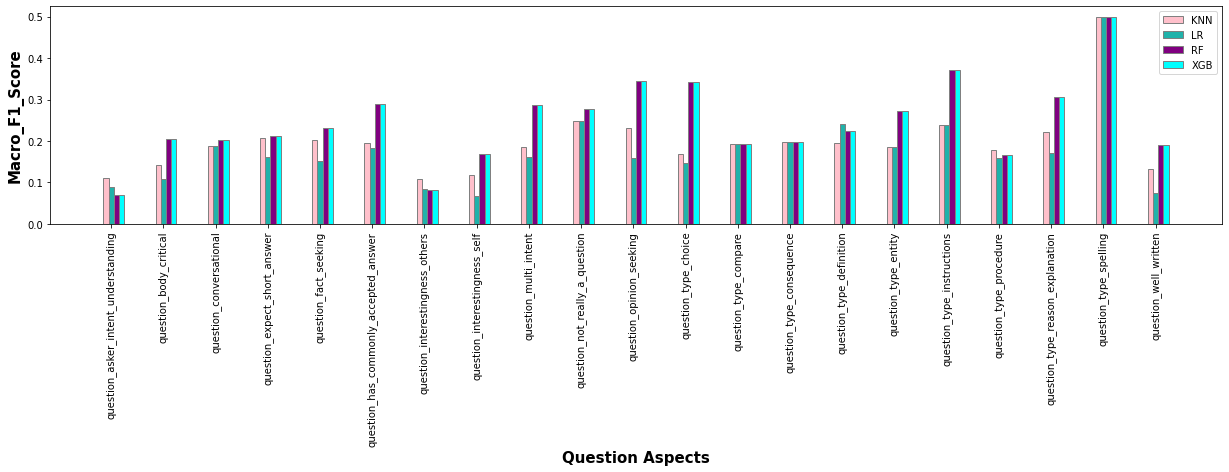

In [51]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(21, 4))
 
# set height of bar
y1 = KNN_Summary['f1_macro'][:21]
y2 = LR_Summary['f1_macro'][:21]
y3 = RF_Summary['mean_f1_macro'][:21]
y4 = XGB_Summary['f1_macro'][:21]
 
# Set position of bar on X axis
br1 = np.arange(len(y1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, y1, color ='pink', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, y2, color ='#20B2AA', width = barWidth,
        edgecolor ='grey', label ='LR')
plt.bar(br3, y3, color ='purple', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br4, y4, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='XGB')
 
# Adding Xticks
plt.xlabel('Question Aspects', fontweight ='bold', fontsize = 15)
plt.ylabel('Macro_F1_Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(y1))],
        KNN_Summary['aspect'][:21].values, rotation=90)#, fontweight='bold')
 
plt.legend()
plt.show()

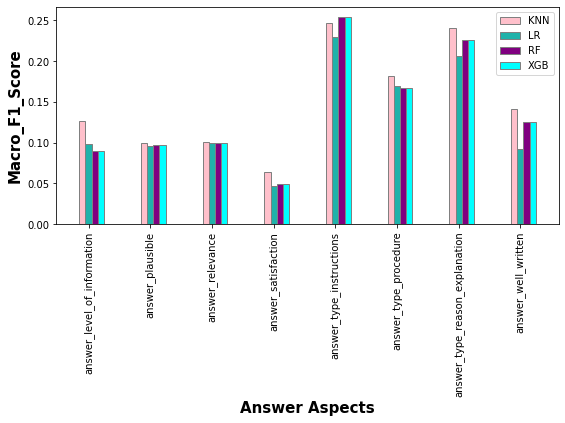

In [52]:
# set width of bar
barWidth = 0.1
fig = plt.subplots(figsize =(9, 4))
 
# set height of bar
y1 = KNN_Summary['f1_macro'][22:]
y2 = LR_Summary['f1_macro'][22:]
y3 = RF_Summary['mean_f1_macro'][22:]
y4 = XGB_Summary['f1_macro'][22:]
 
# Set position of bar on X axis
br1 = np.arange(len(y1))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
 
# Make the plot
plt.bar(br1, y1, color ='pink', width = barWidth,
        edgecolor ='grey', label ='KNN')
plt.bar(br2, y2, color ='#20B2AA', width = barWidth,
        edgecolor ='grey', label ='LR')
plt.bar(br3, y3, color ='purple', width = barWidth,
        edgecolor ='grey', label ='RF')
plt.bar(br4, y4, color ='cyan', width = barWidth,
        edgecolor ='grey', label ='XGB')
 
# Adding Xticks
plt.xlabel('Answer Aspects', fontweight ='bold', fontsize = 15)
plt.ylabel('Macro_F1_Score', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(y1))],
        KNN_Summary['aspect'][22:].values, rotation=90)#, fontweight='bold')
 
plt.legend()
plt.show()

In [53]:
import pandas as pd
Result = pd.DataFrame(columns = ['Model', 'Spearman correlation coefficient'])
Result.loc[len(Result.index)] = ['Random Model', 0.1557]
Result.loc[len(Result.index)] = ['K-Nearest Neighbor', 0.7390]
Result.loc[len(Result.index)] = ['Logistic Regression', 0.7524]
Result.loc[len(Result.index)] = ['XGBoost', 0.7931]
Result.loc[len(Result.index)] = ['Random Forest', 0.7979]
Result.loc[len(Result.index)] = ['Average of KNN, LR, RF, XGB', 0.8199]
Result.loc[len(Result.index)] = ['Weighted Average of KNN, LR, RF, XGB', 0.8205]
Result

,Model,Spearman correlation coefficient
0,Random Model,0.1557
1,K-Nearest Neighbor,0.7390
2,Logistic Regression,0.7524
3,XGBoost,0.7931
4,Random Forest,0.7979
5,"Average of KNN, LR, RF, XGB",0.8199
6,"Weighted Average of KNN, LR, RF, XGB",0.8205


---

#### **Best Spearman's correlation coefficient is 0.8205 achieved using weighted average of K-Nearest Neighbour, Logistic Regression, Random Forest and XGBoost.**

<li> Random Forest Algorithm outperformed all the models with SCC of 0.7979. </li>
<li> Since each aspect has discrete set of values, classification performed better than regression. </li>
<li> Since classes are of increasing order, there is possibility exact porobability is little deviatd to next or previous number. </li>
<li> Hence, Accuracy Score off by 1 seems more uselfull than exact Accuracy Score.</li>

---

**Thank you!**